In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
BASE_dir = 'data/processed/'

train = pd.read_json(BASE_dir + 'train.json')
test = pd.read_json(BASE_dir + 'test.json')

In [81]:
agg_df = train.groupby('inc_angle').agg({"is_iceberg": [len, np.sum]}).sort_values([('is_iceberg', 'len')], ascending=False)
print(agg_df.to_string())
candidate = agg_df.loc[agg_df.iloc[:,0]>=8,:]

candidate
ice_angle = candidate.index[candidate.iloc[:,1]==candidate.iloc[:,0]].values
ship_angle = candidate.index[candidate.iloc[:,1]!=candidate.iloc[:,0]].values
ship_angle = ship_angle[1:]
# candidate.iloc[:,1].values==candidate.iloc[:,0].values
print(ice_angle)
print(ship_angle)

                   is_iceberg    
                          len sum
inc_angle                        
na                        133   0
34.4721                    23  23
42.5591                    16  16
36.1061                    15  15
33.6352                    15  15
39.234                     13  13
38.4755                    11  11
39.2166                    11  11
39.9784                    11  11
45.2814                    11  11
34.4709                    10  10
42.559                     10  10
45.2859                    10  10
40.7118                     9   9
40.7129                     9   9
39.2325                     9   9
34.4718                     9   9
37.6877                     9   9
38.4591                     9   9
35.7863                     9   0
35.2957                     8   8
37.6866                     8   8
38.0736                     8   8
38.8594                     7   7
42.5644                     7   7
40.3904                     7   7
43.2611       

In [40]:
# sub.loc[sub.inc_angle == 42.5598,:]
temp11.loc[sub.id.isin(['cd47e542']), :]
# sub.inc_angle.isin(['cd47e542'])
# temp11.corr()
# np.sum([for i in ])

,fcn,cnn,inception,basic_vgg,vgg19,resnet50,200-dense,my_gbm,new_cnn,senet,vggbn,is_iceberg_max,is_iceberg_min,is_iceberg_median,is_iceberg_mean,is_iceberg,in_ice_angle,in_ship_angle,leak_is_iceberg
5656,0.421496,0.337117,0.162896,0.48857,0.578969,0.159226,0.0553,0.626812,0.559148,0.354422,0.555629,0.626812,0.0553,0.421496,0.390871,0.421496,True,False,0.999


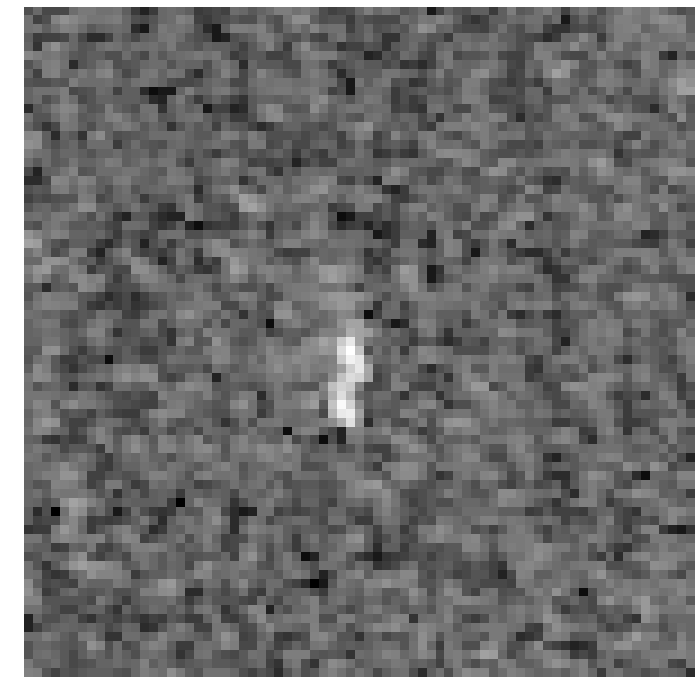

In [41]:
fig = plt.figure(figsize=(12,12))

ax = plt.subplot()
plt.axis('off')

plt.imshow(np.array(test.iloc[5656,1]).reshape(75,75))

In [3]:
temp13= pd.read_csv('resnet34_retrain_all.csv')
#temp12.corr()
temp13['is_iceberg_max'] = temp13.iloc[:, :23].max(axis=1)
temp13['is_iceberg_min'] = temp13.iloc[:, :23].min(axis=1)
temp13['is_iceberg_median'] = temp13.iloc[:, :23].median(axis=1)
temp13['is_iceberg_mean'] = temp13.iloc[:, :23].mean(axis=1)
# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.95
cutoff_hi = 0.05

#temp11['is_iceberg_base'] = temp11['is_iceberg3']
# temp13['is_iceberg'] = np.where(np.all(temp13.iloc[:,0:23] > cutoff_lo, axis=1), 
#                                     temp13['is_iceberg_max'], 
#                                     np.where(np.all(temp13.iloc[:,0:23] < cutoff_hi, axis=1),
#                                              temp13['is_iceberg_min'], 
#                                              temp13['is_iceberg_median']))

temp13['is_iceberg'] = temp13['is_iceberg_mean']

# temp13 = pd.read_csv('others/resnet34_10fold_40.csv')

# for i in range(4):
#     temp13['is_iceberg_max'] = temp13.iloc[:, 10*i:10*(i+1)].max(axis=1)
#     temp13['is_iceberg_min'] = temp13.iloc[:, 10*i:10*(i+1)].min(axis=1)
#     temp13['is_iceberg_median'] = temp13.iloc[:, 10*i:10*(i+1)].median(axis=1)
#     temp13['is_iceberg_mean'] = temp13.iloc[:, 10*i:10*(i+1)].mean(axis=1)
    
#     msg = 'is_iceberg_summary%d'%i
#     cutoff_lo = 0.8
#     cutoff_hi = 0.2

#     # temp11['is_iceberg_base'] = temp11['senet']
#     temp13[msg] = np.where(np.all(temp13.iloc[:,10*i:10*(i+1)] > cutoff_lo, axis=1), 
#                                     temp13['is_iceberg_max'], 
#                                     np.where(np.all(temp13.iloc[:,10*i:10*(i+1)] < cutoff_hi, axis=1),
#                                              temp13['is_iceberg_min'], 
#                                              temp13['is_iceberg_median']))

    
# # temp13['is_iceberg']=(temp13['is_iceberg_summary0']+temp13['is_iceberg_summary1'] +temp13['is_iceberg_summary2'] +
# #                         temp13['is_iceberg_summary3'] +temp13['is_iceberg_summary4'])/5

# temp13['is_iceberg']=(temp13['is_iceberg_summary0']+temp13['is_iceberg_summary1'] +temp13['is_iceberg_summary2'] +
#                         temp13['is_iceberg_summary3'])/4




In [4]:
# temp11 = pd.read_csv('50_plain_fcn.csv')
# temp11['is_iceberg_max'] = temp11.iloc[:, :50].max(axis=1)
# temp11['is_iceberg_min'] = temp11.iloc[:, :50].min(axis=1)
# temp11['is_iceberg_median'] = temp11.iloc[:, :50].median(axis=1)
# temp11['is_iceberg_mean'] = temp11.iloc[:, :50].mean(axis=1)
# # set up cutoff threshold for lower and upper bounds, easy to twist 
# cutoff_lo = 0.95
# cutoff_hi = 0.05

# #temp11['is_iceberg_base'] = temp11['is_iceberg3']
# # temp11['is_iceberg'] = np.where(np.all(temp11.iloc[:,0:50] > cutoff_lo, axis=1), 
# #                                     temp11['is_iceberg_max'], 
# #                                     np.where(np.all(temp11.iloc[:,0:50] < cutoff_hi, axis=1),
# #                                              temp11['is_iceberg_min'], 
# #                                              temp11['is_iceberg_median']))

# temp11 = pd.read_csv('submissionfcn.csv')
# temp11['is_iceberg'] = temp11['is_iceberg']

temp11 = pd.read_csv('others/fcn_20_models.csv')
temp11['is_iceberg'] = temp11.iloc[:,:20].mean(axis=1)




# temp11 = pd.read_csv('others/fcn_10fold_30.csv')

# for i in range(3):
#     temp11['is_iceberg_max'] = temp11.iloc[:, 10*i:10*(i+1)].max(axis=1)
#     temp11['is_iceberg_min'] = temp11.iloc[:, 10*i:10*(i+1)].min(axis=1)
#     temp11['is_iceberg_median'] = temp11.iloc[:, 10*i:10*(i+1)].median(axis=1)
#     temp11['is_iceberg_mean'] = temp11.iloc[:, 10*i:10*(i+1)].mean(axis=1)
    
#     msg = 'is_iceberg_summary%d'%i
#     cutoff_lo = 0.8
#     cutoff_hi = 0.2

#     # temp11['is_iceberg_base'] = temp11['senet']
#     temp11[msg] = np.where(np.all(temp11.iloc[:,10*i:10*(i+1)] > cutoff_lo, axis=1), 
#                                     temp11['is_iceberg_max'], 
#                                     np.where(np.all(temp11.iloc[:,10*i:10*(i+1)] < cutoff_hi, axis=1),
#                                              temp11['is_iceberg_min'], 
#                                              temp11['is_iceberg_median']))

    
# # temp13['is_iceberg']=(temp13['is_iceberg_summary0']+temp13['is_iceberg_summary1'] +temp13['is_iceberg_summary2'] +
# #                         temp13['is_iceberg_summary3'] +temp13['is_iceberg_summary4'])/5

# temp11['is_iceberg']=(temp11['is_iceberg_summary0']+temp11['is_iceberg_summary1'] +temp11['is_iceberg_summary2'])/3

In [5]:
# temp12= pd.read_csv('plain_cnn_LB0_1636.csv')
# num=5
# temp12['is_iceberg_max'] = temp12.iloc[:, :num].max(axis=1)
# temp12['is_iceberg_min'] = temp12.iloc[:, :num].min(axis=1)
# temp12['is_iceberg_median'] = temp12.iloc[:, :num].median(axis=1)
# temp12['is_iceberg_mean'] = temp12.iloc[:, :num].mean(axis=1)
# # set up cutoff threshold for lower and upper bounds, easy to twist 
# cutoff_lo = 0.95
# cutoff_hi = 0.05

#temp11['is_iceberg_base'] = temp11['is_iceberg3']
# temp12['is_iceberg'] = np.where(np.all(temp12.iloc[:,0:36] > cutoff_lo, axis=1), 
#                                     temp12['is_iceberg_max'], 
#                                     np.where(np.all(temp12.iloc[:,0:36] < cutoff_hi, axis=1),
#                                              temp12['is_iceberg_min'], 
#                                              temp12['is_iceberg_median']))

# temp12['is_iceberg']=temp12['is_iceberg_mean'] 


# temp12 = pd.read_csv('others/plain_cnn_30_models.csv')
# temp12['is_iceberg'] = temp12.iloc[:,:30].mean(axis=1)

temp12 = pd.read_csv('others/cnn_angle_10fold_50.csv')

for i in range(5):
    temp12['is_iceberg_max'] = temp12.iloc[:, 10*i:10*(i+1)].max(axis=1)
    temp12['is_iceberg_min'] = temp12.iloc[:, 10*i:10*(i+1)].min(axis=1)
    temp12['is_iceberg_median'] = temp12.iloc[:, 10*i:10*(i+1)].median(axis=1)
    temp12['is_iceberg_mean'] = temp12.iloc[:, 10*i:10*(i+1)].mean(axis=1)
    
    msg = 'is_iceberg_summary%d'%i
    cutoff_lo = 0.8
    cutoff_hi = 0.2

    # temp11['is_iceberg_base'] = temp11['senet']
    temp12[msg] = np.where(np.all(temp12.iloc[:,10*i:10*(i+1)] > cutoff_lo, axis=1), 
                                    temp12['is_iceberg_max'], 
                                    np.where(np.all(temp12.iloc[:,10*i:10*(i+1)] < cutoff_hi, axis=1),
                                             temp12['is_iceberg_min'], 
                                             temp12['is_iceberg_median']))

    
temp12['is_iceberg']=(temp12['is_iceberg_summary0']+temp12['is_iceberg_summary1'] +temp12['is_iceberg_summary2'] +
                        temp12['is_iceberg_summary3'] +temp12['is_iceberg_summary4'])/5



In [6]:
#Inception v-3

# temp14= pd.read_csv('6_retrain_inception.csv')
# temp14= pd.read_csv('others/incep_10fold.csv')
# num=10
# temp14['is_iceberg_max'] = temp14.iloc[:, :10].max(axis=1)
# temp14['is_iceberg_min'] = temp14.iloc[:, :10].min(axis=1)
# temp14['is_iceberg_median'] = temp14.iloc[:, :10].median(axis=1)
# temp14['is_iceberg_mean'] = temp14.iloc[:, :10].mean(axis=1)
# # set up cutoff threshold for lower and upper bounds, easy to twist 
# cutoff_lo = 0.9
# cutoff_hi = 0.1

# #temp11['is_iceberg_base'] = temp11['is_iceberg3']
# # temp14['is_iceberg'] = np.where(np.all(temp14.iloc[:,0:num] > cutoff_lo, axis=1), 
# #                                     temp14['is_iceberg_max'], 
# #                                     np.where(np.all(temp14.iloc[:,0:num] < cutoff_hi, axis=1),
# #                                              temp14['is_iceberg_min'], 
# #                                              temp14['is_iceberg_median']))
# temp14['is_iceberg']=temp14['is_iceberg_median'] 

# temp16 = pd.read_csv('others/resnet50_10fold_withaug_nodense_all50.csv')

# temp14 = pd.read_csv('others/incep_10fold_all50.csv')
# for i in range(5):
#     msg = 'is_iceberg_summary%d'%i
#     temp14[msg] = temp14.iloc[:, 10*i:10*(i+1)].median(axis=1)
# temp14['is_iceberg']=(temp14['is_iceberg_summary0'] +temp14['is_iceberg_summary1'] +temp14['is_iceberg_summary2'] +
#                         temp14['is_iceberg_summary3'] +temp14['is_iceberg_summary4'] )/5

temp14 = pd.read_csv('others/incep_10fold_all50.csv')

for i in range(5):
    temp14['is_iceberg_max'] = temp14.iloc[:, 10*i:10*(i+1)].max(axis=1)
    temp14['is_iceberg_min'] = temp14.iloc[:, 10*i:10*(i+1)].min(axis=1)
    temp14['is_iceberg_median'] = temp14.iloc[:, 10*i:10*(i+1)].median(axis=1)
    temp14['is_iceberg_mean'] = temp14.iloc[:, 10*i:10*(i+1)].mean(axis=1)
    
    msg = 'is_iceberg_summary%d'%i
    cutoff_lo = 0.8
    cutoff_hi = 0.2

    # temp11['is_iceberg_base'] = temp11['senet']
    temp14[msg] = np.where(np.all(temp14.iloc[:,10*i:10*(i+1)] > cutoff_lo, axis=1), 
                                    temp14['is_iceberg_max'], 
                                    np.where(np.all(temp14.iloc[:,10*i:10*(i+1)] < cutoff_hi, axis=1),
                                             temp14['is_iceberg_min'], 
                                             temp14['is_iceberg_median']))

    
temp14['is_iceberg']=(temp14['is_iceberg_summary0']+temp14['is_iceberg_summary1'] +temp14['is_iceberg_summary2'] +
                        temp14['is_iceberg_summary3'] +temp14['is_iceberg_summary4'])/5

# # temp16['is_iceberg']=temp16.iloc[:,54:58].median(axis=1)



In [7]:
#vgg16
# temp15 = pd.read_csv('submissionlkm.csv')
# temp15 = pd.read_csv('others/vgg_10fold.csv')
# temp15['is_iceberg']=temp15.iloc[:,:10].median(axis=1)


temp15 = pd.read_csv('others/vgg16_10fold_50.csv')

for i in range(5):
    temp15['is_iceberg_max'] = temp15.iloc[:, 10*i:10*(i+1)].max(axis=1)
    temp15['is_iceberg_min'] = temp15.iloc[:, 10*i:10*(i+1)].min(axis=1)
    temp15['is_iceberg_median'] = temp15.iloc[:, 10*i:10*(i+1)].median(axis=1)
    temp15['is_iceberg_mean'] = temp15.iloc[:, 10*i:10*(i+1)].mean(axis=1)
    
    msg = 'is_iceberg_summary%d'%i
    cutoff_lo = 0.8
    cutoff_hi = 0.2

    # temp11['is_iceberg_base'] = temp11['senet']
    temp15[msg] = np.where(np.all(temp15.iloc[:,10*i:10*(i+1)] > cutoff_lo, axis=1), 
                                    temp15['is_iceberg_max'], 
                                    np.where(np.all(temp15.iloc[:,10*i:10*(i+1)] < cutoff_hi, axis=1),
                                             temp15['is_iceberg_min'], 
                                             temp15['is_iceberg_median']))

    
temp15['is_iceberg']=(temp15['is_iceberg_summary0']+temp15['is_iceberg_summary1'] +temp15['is_iceberg_summary2'] +
                        temp15['is_iceberg_summary3'] +temp15['is_iceberg_summary4'])/5


In [4]:
temp15.shape

(8424, 60)

In [8]:
#vgg19
# temp17 = pd.read_csv('others/vgg19_10fold.csv')
# temp17['is_iceberg']=temp17.iloc[:,:10].median(axis=1)

# num=10
# temp17['is_iceberg_max'] = temp17.iloc[:, :num].max(axis=1)
# temp17['is_iceberg_min'] = temp17.iloc[:, :num].min(axis=1)
# temp17['is_iceberg_median'] = temp17.iloc[:, :num].median(axis=1)
# temp17['is_iceberg_mean'] = temp17.iloc[:, :num].mean(axis=1)
# # set up cutoff threshold for lower and upper bounds, easy to twist 
# cutoff_lo = 0.8
# cutoff_hi = 0.2

# # temp11['is_iceberg_base'] = temp11['senet']
# temp17['is_iceberg'] = np.where(np.all(temp17.iloc[:,0:num] > cutoff_lo, axis=1), 
#                                     temp17['is_iceberg_max'], 
#                                     np.where(np.all(temp17.iloc[:,0:num] < cutoff_hi, axis=1),
#                                              temp17['is_iceberg_min'], 
#                                              temp17['is_iceberg_median']))
# temp17['is_iceberg'] = temp17['is_iceberg_median']



temp17 = pd.read_csv('others/vgg19_10fold_all50.csv')

for i in range(5):
    temp17['is_iceberg_max'] = temp17.iloc[:, 10*i:10*(i+1)].max(axis=1)
    temp17['is_iceberg_min'] = temp17.iloc[:, 10*i:10*(i+1)].min(axis=1)
    temp17['is_iceberg_median'] = temp17.iloc[:, 10*i:10*(i+1)].median(axis=1)
    temp17['is_iceberg_mean'] = temp17.iloc[:, 10*i:10*(i+1)].mean(axis=1)
    
    msg = 'is_iceberg_summary%d'%i
    cutoff_lo = 0.8
    cutoff_hi = 0.2

    # temp11['is_iceberg_base'] = temp11['senet']
    temp17[msg] = np.where(np.all(temp17.iloc[:,10*i:10*(i+1)] > cutoff_lo, axis=1), 
                                    temp17['is_iceberg_max'], 
                                    np.where(np.all(temp17.iloc[:,10*i:10*(i+1)] < cutoff_hi, axis=1),
                                             temp17['is_iceberg_min'], 
                                             temp17['is_iceberg_median']))


#I will use mean :)
temp17['is_iceberg']=(temp17['is_iceberg_summary0']+temp17['is_iceberg_summary1'] +temp17['is_iceberg_summary2'] +
                        temp17['is_iceberg_summary3'] +temp17['is_iceberg_summary4'])/5


In [9]:
#resnet50
# temp16 = pd.read_csv('others/resnet50_10fold_withaug_nodense_all50.csv')
# temp16['is_iceberg']=temp16.iloc[:,:10].median(axis=1)


# temp16= pd.read_csv('others/resnet50_10fold.csv')
# num=10
# temp16['is_iceberg_max'] = temp16.iloc[:, :10].max(axis=1)
# temp16['is_iceberg_min'] = temp16.iloc[:, :10].min(axis=1)
# temp16['is_iceberg_median'] = temp16.iloc[:, :10].median(axis=1)
# temp16['is_iceberg_mean'] = temp16.iloc[:, :10].mean(axis=1)
# # set up cutoff threshold for lower and upper bounds, easy to twist 
# cutoff_lo = 0.9
# cutoff_hi = 0.1

# #temp11['is_iceberg_base'] = temp11['is_iceberg3']
# temp16['is_iceberg'] = np.where(np.all(temp16.iloc[:,0:num] > cutoff_lo, axis=1), 
#                                     temp16['is_iceberg_max'], 
#                                     np.where(np.all(temp16.iloc[:,0:num] < cutoff_hi, axis=1),
#                                              temp16['is_iceberg_min'], 
#                                              temp16['is_iceberg_median']))


###plain mean
# temp16 = pd.read_csv('others/resnet50_10fold_withaug_nodense_all50.csv')

# for i in range(5):
#     msg = 'is_iceberg_summary%d'%i
#     temp16[msg] = temp16.iloc[:, 10*i:10*(i+1)].median(axis=1)
# temp16['is_iceberg']=(temp16['is_iceberg_summary0'] +temp16['is_iceberg_summary1'] +temp16['is_iceberg_summary2'] +
#                         temp16['is_iceberg_summary3'] +temp16['is_iceberg_summary4'] )/5


###my revised one
temp16 = pd.read_csv('others/resnet50_10fold_withaug_nodense_all50.csv')

for i in range(5):
    temp16['is_iceberg_max'] = temp16.iloc[:, 10*i:10*(i+1)].max(axis=1)
    temp16['is_iceberg_min'] = temp16.iloc[:, 10*i:10*(i+1)].min(axis=1)
    temp16['is_iceberg_median'] = temp16.iloc[:, 10*i:10*(i+1)].median(axis=1)
    temp16['is_iceberg_mean'] = temp16.iloc[:, 10*i:10*(i+1)].mean(axis=1)
    
    msg = 'is_iceberg_summary%d'%i
    cutoff_lo = 0.8
    cutoff_hi = 0.2

    # temp11['is_iceberg_base'] = temp11['senet']
    temp16[msg] = np.where(np.all(temp16.iloc[:,10*i:10*(i+1)] > cutoff_lo, axis=1), 
                                    temp16['is_iceberg_max'], 
                                    np.where(np.all(temp16.iloc[:,10*i:10*(i+1)] < cutoff_hi, axis=1),
                                             temp16['is_iceberg_min'], 
                                             temp16['is_iceberg_median']))


#I will use mean :)
temp16['is_iceberg']=(temp16['is_iceberg_summary0']+temp16['is_iceberg_summary1'] +temp16['is_iceberg_summary2'] +
                        temp16['is_iceberg_summary3'] +temp16['is_iceberg_summary4'])/5

# temp16['is_iceberg']=temp16.iloc[:,54:58].median(axis=1)


In [ ]:
#np.mean(-np.log(temp16['is_iceberg']) * train['is_iceberg']-np.log(1-temp16['is_iceberg']) * (1-train['is_iceberg']))
-np.log(temp16['is_iceberg']) * train['is_iceberg']-np.log(1-temp16['is_iceberg']) * (1-train['is_iceberg'])

In [4]:
temp161 = pd.read_csv('others/vgg19_10fold.csv')
temp162 = pd.read_csv('others/vgg19_10fold_40.csv')
# temp163 = pd.read_csv('others/resnet50_10fold_withaug_nodense3.csv')
a = pd.concat((temp161,temp162), axis=1)
# temp16['is_iceberg_summary0']
a.shape

(8424, 50)

In [5]:
a.to_csv('others/vgg19_10fold_all50.csv',index=False)

In [11]:
#resnet18: not use for now
temp18 = pd.read_csv('others/resnet50_10fold.csv')
temp18['is_iceberg']=temp18.iloc[:,:10].median(axis=1)


temp18['is_iceberg_max'] = temp16.iloc[:, :10].max(axis=1)
temp18['is_iceberg_min'] = temp16.iloc[:, :10].min(axis=1)
temp18['is_iceberg_median'] = temp16.iloc[:, :10].median(axis=1)
temp16['is_iceberg_mean'] = temp16.iloc[:, :10].mean(axis=1)
# # set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.9
cutoff_hi = 0.1

#temp11['is_iceberg_base'] = temp11['is_iceberg3']
temp16['is_iceberg'] = np.where(np.all(temp16.iloc[:,0:num] > cutoff_lo, axis=1), 
                                    temp16['is_iceberg_max'], 
                                    np.where(np.all(temp16.iloc[:,0:num] < cutoff_hi, axis=1),
                                             temp16['is_iceberg_min'], 
                                             temp16['is_iceberg_median']))


NameError: name 'num' is not defined

In [15]:
temp19 = pd.read_csv('others/vgg_mob_10fold_10.csv')

for i in range(1):
    temp19['is_iceberg_max'] = temp19.iloc[:, 10*i:10*(i+1)].max(axis=1)
    temp19['is_iceberg_min'] = temp19.iloc[:, 10*i:10*(i+1)].min(axis=1)
    temp19['is_iceberg_median'] = temp19.iloc[:, 10*i:10*(i+1)].median(axis=1)
    temp19['is_iceberg_mean'] = temp19.iloc[:, 10*i:10*(i+1)].mean(axis=1)
    
    msg = 'is_iceberg_summary%d'%i
    cutoff_lo = 0.8
    cutoff_hi = 0.2

    # temp11['is_iceberg_base'] = temp11['senet']
    temp19[msg] = np.where(np.all(temp19.iloc[:,10*i:10*(i+1)] > cutoff_lo, axis=1), 
                                    temp19['is_iceberg_max'], 
                                    np.where(np.all(temp19.iloc[:,10*i:10*(i+1)] < cutoff_hi, axis=1),
                                             temp19['is_iceberg_min'], 
                                             temp19['is_iceberg_median']))

temp19['is_iceberg']=  temp19['is_iceberg_summary0']
# temp12['is_iceberg']=(temp12['is_iceberg_summary0']+temp12['is_iceberg_summary1'] +temp12['is_iceberg_summary2'] +
#                         temp12['is_iceberg_summary3'] +temp12['is_iceberg_summary4'])/5

In [10]:

temp111= pd.read_csv('others/sub_200_ens_densenet.csv')
temp112= pd.read_csv('others/sub_blend009.csv')
temp112_2= pd.read_csv('others/my_gbm_463mean.csv')

temp113= pd.read_csv('others/sub_fcn.csv')

temp114= pd.read_csv('others/senet_ice.csv')
temp115= pd.read_csv('others/sub_TF_keras.csv')
temp116= pd.read_csv('others/sub_keras_beginner.csv')
temp117= pd.read_csv('others/vggbnw_fcn_en.csv')
temp118 = pd.read_csv('others/LB1541_final_ensemble.csv')
temp117 = temp115.join(temp117.set_index('id'), rsuffix='_other',on='id')
#! ls others

In [9]:
temp17.corr()

,is_iceberg
is_iceberg,1.0


In [11]:
for_test = pd.DataFrame()
for_test['fcn']=temp11['is_iceberg']
for_test['cnn']=temp12['is_iceberg']
# for_test['resnet34']=temp13['is_iceberg']
for_test['inception'] = temp14['is_iceberg']
for_test['basic_vgg'] = temp15['is_iceberg']
for_test['vgg19'] = temp17['is_iceberg']
for_test['resnet50'] = temp16['is_iceberg']
# for_test['vgg_mob'] =temp19['is_iceberg']

for_test['200-dense']=temp111['is_iceberg']
for_test['my_gbm']=temp112_2['is_iceberg']
# 
for_test['new_cnn']= temp118['is_iceberg']
for_test['senet']=temp114['is_iceberg']
for_test['vggbn']= temp117['is_iceberg_other']

# for_test['gbm']=temp112['is_iceberg']
# for_test['ori_fcn']=temp113['is_iceberg']
# for_test['tf-keras'] =temp115['is_iceberg']
# for_test['keras'] =temp116['is_iceberg']


for_test.corr()

,fcn,cnn,inception,basic_vgg,vgg19,resnet50,200-dense,my_gbm,new_cnn,senet,vggbn
fcn,1.000000,0.832348,0.916128,0.861813,0.898752,0.933076,0.938665,0.433951,0.699870,0.933137,0.855066
cnn,0.832348,1.000000,0.798170,0.918358,0.897122,0.800631,0.811620,0.596972,0.837483,0.895147,0.843168
inception,0.916128,0.798170,1.000000,0.823361,0.865564,0.965714,0.941159,0.420814,0.664051,0.921430,0.870805
basic_vgg,0.861813,0.918358,0.823361,1.000000,0.957020,0.824464,0.822954,0.618320,0.828586,0.903050,0.879678
vgg19,0.898752,0.897122,0.865564,0.957020,1.000000,0.876878,0.866716,0.557442,0.786077,0.917590,0.877734
resnet50,0.933076,0.800631,0.965714,0.824464,0.876878,1.000000,0.944878,0.393136,0.652422,0.923059,0.854346
200-dense,0.938665,0.811620,0.941159,0.822954,0.866716,0.944878,1.000000,0.411951,0.659503,0.951330,0.847724
my_gbm,0.433951,0.596972,0.420814,0.618320,0.557442,0.393136,0.411951,1.000000,0.695878,0.548838,0.555548
new_cnn,0.699870,0.837483,0.664051,0.828586,0.786077,0.652422,0.659503,0.695878,1.000000,0.785668,0.750361
senet,0.933137,0.895147,0.921430,0.903050,0.917590,0.923059,0.951330,0.548838,0.785668,1.000000,0.884432


In [65]:
for_test = pd.DataFrame()
# for_test['fcn']=temp11['is_iceberg']
for_test['cnn']=temp12['is_iceberg']
# for_test['resnet34']=temp13['is_iceberg']
for_test['inception'] = temp14['is_iceberg']
for_test['basic_vgg'] = temp15['is_iceberg']
for_test['vgg19'] = temp17['is_iceberg']
for_test['resnet50'] = temp16['is_iceberg']


for_test['200-dense']=temp111['is_iceberg']
for_test['my_gbm']=temp112_2['is_iceberg']

for_test['senet']=temp114['is_iceberg']

# for_test['ori_fcn'] = temp114['is_iceberg']
for_test.corr()

,cnn,inception,basic_vgg,vgg19,resnet50,200-dense,my_gbm,senet
cnn,1.000000,0.798170,0.918358,0.897122,0.800631,0.811620,0.596972,0.895147
inception,0.798170,1.000000,0.823361,0.865564,0.965714,0.941159,0.420814,0.921430
basic_vgg,0.918358,0.823361,1.000000,0.957020,0.824464,0.822954,0.618320,0.903050
vgg19,0.897122,0.865564,0.957020,1.000000,0.876878,0.866716,0.557442,0.917590
resnet50,0.800631,0.965714,0.824464,0.876878,1.000000,0.944878,0.393136,0.923059
200-dense,0.811620,0.941159,0.822954,0.866716,0.944878,1.000000,0.411951,0.951330
my_gbm,0.596972,0.420814,0.618320,0.557442,0.393136,0.411951,1.000000,0.548838
senet,0.895147,0.921430,0.903050,0.917590,0.923059,0.951330,0.548838,1.000000


In [ ]:
# print(temp117['id'])
# temp115['id']
# print(temp117.set_index('id'))
temp115.join(temp117.set_index('id'), rsuffix='_other',on='id')

In [27]:
temp17 = pd.read_csv('r2_11_plain_cnn.csv')
# temp17.columns= range(11)
# final = temp17.join(temp12)
temp12['base_model'] = temp17.mean(axis=1)
final = temp12

In [ ]:
final.corr()

In [121]:
temp11 = for_test
num=11

temp11['is_iceberg_max'] = temp11.iloc[:, :num].max(axis=1)
temp11['is_iceberg_min'] = temp11.iloc[:, :num].min(axis=1)
temp11['is_iceberg_median'] = temp11.iloc[:, :num].median(axis=1)
temp11['is_iceberg_mean'] = temp11.iloc[:, :num].mean(axis=1)
# temp11['is_iceberg_weighted'] = (for_test['fcn']*2+
#                                 for_test['cnn']*3+
#                                 for_test['resnet34']*2+
#                                 for_test['inception']*2+
#                                 for_test['basic_vgg']*1+
#                                 for_test['200-dense']*3+
#                                 for_test['my_gbm']*1+
#                                 for_test['senet']*3)/17

# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.5
cutoff_hi = 0.5
temp11['in_ice_angle'] = test.inc_angle.isin(ice_angle)
temp11['in_ship_angle'] = test.inc_angle.isin(ship_angle)



temp11['is_iceberg'] = np.where(np.all(temp11.iloc[:,0:num] > cutoff_lo, axis=1), 
                                    temp11['is_iceberg_max'], 
                                    np.where(np.all(temp11.iloc[:,0:num] < cutoff_hi, axis=1),
                                             temp11['is_iceberg_min'], 
                                             temp11['is_iceberg_median']))



# temp11['leak_is_iceberg'] = np.where(temp11.in_ice_angle.values, np.maximum(temp11.is_iceberg, 1), temp11.is_iceberg)
# temp11['leak_is_iceberg'] = np.where(temp11.in_ship_angle.values, np.minimum(temp11.leak_is_iceberg, 0), temp11.leak_is_iceberg)



# temp11['is_iceberg'] = np.where(np.all(temp11.iloc[:,0:num] > cutoff_lo, axis=1), 
#                                     1, 
#                                     np.where(np.all(temp11.iloc[:,0:num] < cutoff_hi, axis=1),
#                                              0, 
#                                              temp11['is_iceberg_median']))



# temp11['is_iceberg'] = np.where(np.all(temp11.iloc[:,0:num] > cutoff_lo, axis=1), 
#                                     1-1e-10, 
#                                     np.where(np.all(temp11.iloc[:,0:num] < cutoff_hi, axis=1),
#                                              1e-10, 
#                                              temp11['is_iceberg_median']))



# temp11 = temp12
# temp11['is_iceberg_max'] = temp11.iloc[:, :36].max(axis=1)
# temp11['is_iceberg_min'] = temp11.iloc[:, :36].min(axis=1)
# temp11['is_iceberg_median'] = temp11.iloc[:, :36].median(axis=1)
# temp11['is_iceberg_mean'] = temp11.iloc[:, :36].mean(axis=1)
# # set up cutoff threshold for lower and upper bounds, easy to twist 
# cutoff_lo = 0.95
# cutoff_hi = 0.05

# #temp11['is_iceberg_base'] = temp11['is_iceberg3']
#  temp11['is_iceberg'] = np.where(np.all(temp11.iloc[:,0:36] > cutoff_lo, axis=1), 
#                                     temp11['is_iceberg_max'], 
#                                     np.where(np.all(temp11.iloc[:,0:36] < cutoff_hi, axis=1),
#                                              temp11['is_iceberg_min'], 
#                                              temp11['is_iceberg_median']))

In [61]:
temp11.corr()

,fcn,cnn,resnet34,inception,basic_vgg,vgg19,resnet50,200-dense,my_gbm,new_cnn,senet,vggbn,is_iceberg_max,is_iceberg_min,is_iceberg_median,is_iceberg_mean,is_iceberg
fcn,1.000000,0.917837,0.891663,0.927389,0.936858,0.952502,0.929351,0.928243,0.564859,0.796429,0.962935,0.920723,0.628979,0.892293,0.992924,0.983935,0.995628
cnn,0.917837,1.000000,0.837909,0.798170,0.918358,0.897122,0.800631,0.811620,0.596972,0.837483,0.895147,0.843168,0.674116,0.778923,0.928510,0.932529,0.924979
resnet34,0.891663,0.837909,1.000000,0.835200,0.855172,0.874934,0.843532,0.844862,0.612892,0.796168,0.883297,0.822101,0.657203,0.826520,0.909574,0.926601,0.906578
inception,0.927389,0.798170,0.835200,1.000000,0.823361,0.865564,0.965714,0.941159,0.420814,0.664051,0.921430,0.870805,0.491759,0.935499,0.925727,0.918886,0.923822
basic_vgg,0.936858,0.918358,0.855172,0.823361,1.000000,0.957020,0.824464,0.822954,0.618320,0.828586,0.903050,0.879678,0.687243,0.788515,0.949365,0.951759,0.944952
vgg19,0.952502,0.897122,0.874934,0.865564,0.957020,1.000000,0.876878,0.866716,0.557442,0.786077,0.917590,0.877734,0.629179,0.838111,0.962735,0.956723,0.958718
resnet50,0.929351,0.800631,0.843532,0.965714,0.824464,0.876878,1.000000,0.944878,0.393136,0.652422,0.923059,0.854346,0.469757,0.939815,0.927259,0.916425,0.925452
200-dense,0.928243,0.811620,0.844862,0.941159,0.822954,0.866716,0.944878,1.000000,0.411951,0.659503,0.951330,0.847724,0.482236,0.938529,0.929050,0.918250,0.926260
my_gbm,0.564859,0.596972,0.612892,0.420814,0.618320,0.557442,0.393136,0.411951,1.000000,0.695878,0.548838,0.555548,0.943089,0.403930,0.574877,0.644424,0.578636
new_cnn,0.796429,0.837483,0.796168,0.664051,0.828586,0.786077,0.652422,0.659503,0.695878,1.000000,0.785668,0.750361,0.766680,0.639630,0.812745,0.851647,0.810626


In [92]:
# temp11['is_iceberg_compare'] = pd.read_csv('submission2.csv')['is_iceberg']
# temp11.corr()
# np.sort(temp11.loc[temp11.in_ice_angle, :].is_iceberg)
# np.sort(temp11.loc[temp11.in_ship_angle, :].is_iceberg)
np.where(temp11.in_ice_angle.values, np.maximum(temp11.is_iceberg, 0.999), temp11.is_iceberg)
# np.where(temp11.in_ice_angle.values, 1, 0)
# np.maximum(temp11.is_iceberg, 0.999)
# temp11.in_ice_angle.values

array([  4.74043604e-04,   3.22812960e-01,   5.67078730e-16, ...,
         1.89794508e-04,   9.99798906e-01,   7.50348566e-09])

In [30]:
temp11 = for_test
num=10

temp11['is_not_machine']= test.inc_angle.apply(lambda x:len(str(x))<=8)

temp11['is_iceberg_max'] = temp11.iloc[:, :num].max(axis=1)
temp11['is_iceberg_min'] = temp11.iloc[:, :num].min(axis=1)
temp11['is_iceberg_median'] = temp11.iloc[:, :num].median(axis=1)
temp11['is_iceberg_mean'] = temp11.iloc[:, :num].mean(axis=1)
temp11['if_allover_0.9'] = (np.all(temp11.iloc[:,0:num] > 0.9, axis=1)).astype(np.int)
temp11['if_allover_0.8'] = (np.all(temp11.iloc[:,0:num] >0.8, axis=1)).astype(np.int)
temp11['if_allover_0.7'] = (np.all(temp11.iloc[:,0:num] >0.7, axis=1)).astype(np.int)
# temp11['if_allover_0.6'] = np.all(temp11.iloc[:,0:num] >0.6, axis=1)
temp11['a']= temp11['if_allover_0.9'] +temp11['if_allover_0.8']+temp11['if_allover_0.7']


temp11['if_below_0.3'] = (np.all(temp11.iloc[:,0:num] < 0.3, axis=1)).astype(np.int)
temp11['if_below_0.2'] = (np.all(temp11.iloc[:,0:num] <0.2, axis=1)).astype(np.int)
temp11['if_below_0.1'] = (np.all(temp11.iloc[:,0:num] <0.1, axis=1)).astype(np.int)
temp11['b']= temp11['if_below_0.3'] + temp11['if_below_0.2']+temp11['if_below_0.1']


temp11['is_iceberg'] = np.where(np.all(temp11.iloc[:,0:num] > cutoff_lo, axis=1), 
                                    temp11['is_iceberg_max'], 
                                    np.where(np.all(temp11.iloc[:,0:num] < cutoff_hi, axis=1),
                                             temp11['is_iceberg_min'], 
                                             temp11['is_iceberg_median']))

# temp11['if_9over'] = (np.sum(temp11.iloc[:,0:num] > 0.8, axis=1)>=9)
# temp11['if_9below'] = (np.sum(temp11.iloc[:,0:num] < 0.2, axis=1)>=9)

# set up cutoff threshold for lower and upper bounds, easy to twist 
# cutoff_lo = 0.5
# cutoff_hi = 0.5

# temp11['is_iceberg_base'] = temp11['cnn']
# temp11['is_iceberg'] = np.where((temp11['if_allover_0.9'] +temp11['if_allover_0.8']+temp11['if_allover_0.7']).isin([1,3]), 
#                                     temp11['is_iceberg_max'], 
#                                     np.where((temp11['if_below_0.3'] + temp11['if_below_0.2']+temp11['if_below_0.1']).isin([1,3]),
#                                              temp11['is_iceberg_min'], 
#                                              temp11['is_iceberg_median']))
temp11['is_iceberg'] = np.where((temp11['if_allover_0.9'] +temp11['if_allover_0.8']+temp11['if_allover_0.7']).isin([1,3]), 
                                    1, 
                                    np.where((temp11['if_allover_0.9'] +temp11['if_allover_0.8']+temp11['if_allover_0.7']).isin([2]),
                                             temp11['is_iceberg_max'],
                                             np.where((temp11['if_below_0.3'] + temp11['if_below_0.2']+temp11['if_below_0.1']).isin([1,3]),
                                                      0,
                                                      np.where((temp11['if_below_0.3'] + temp11['if_below_0.2']+temp11['if_below_0.1']).isin([2]),
                                             temp11['is_iceberg_min'], 
                                             temp11['is_iceberg_median']))))
count = 0
for i in range(len(temp11)):
    if temp11.loc[i,'a']==2:
        if temp11.loc[i, 'is_iceberg_max'] >0.995:
            temp11.loc[i,'is_iceberg'] = 1
            count+=1
        else:
            pass
    if temp11.loc[i,'b']==2:
        if temp11.loc[i, 'is_iceberg_min'] <0.005:
            temp11.loc[i,'is_iceberg'] = 0
            count+=1
        else:
            pass

print(count)

# temp11['is_iceberg'] = np.where(temp11['if_9over'], 
#                                     temp11['is_iceberg_max'], 
#                                     np.where(temp11['if_9below'],
#                                              temp11['is_iceberg_min'], 
#                                              temp11['is_iceberg_median']))

# temp11.loc[temp11['if_allover_0.9']== True and temp11['if_allover_0.8'] ==True ,:]

# np.sum((temp11['if_allover_0.9'].values== True).astype(np.int) + (temp11['if_allover_0.8'].values ==True).astype(np.int) == 2)

# for i in temp11['is_iceberg_median'][temp11['if_allover_0.9']!=temp11['if_allover_0.8']]:
#     print(i)


659


In [56]:
np.sum(temp11['b']==2)

547

In [31]:
np.sum(temp11.is_not_machine)
# temp11.is_machine

3412

In [47]:
# print(np.sum(temp11['if_allover_0.9']),
# np.sum(temp11['if_allover_0.8']),
# np.sum(temp11['if_allover_0.7']),
# np.sum(temp11['if_allover_0.6']))

# k = temp11.loc[(temp11['if_allover_0.9'] +temp11['if_allover_0.8']).isin([1]),['is_iceberg_median', 'is_iceberg_max']]
# loss1 = k.iloc[:,0]
# print(k)

# loss1 = -np.sum(np.log(k.iloc[:,0]))
# print(loss1)
# loss1 = -np.sum(np.log(k.iloc[:,1]))
# print(loss1)


# for_test.corr()

k = temp11.loc[(temp11['if_allover_0.9'] +temp11['if_allover_0.8']+temp11['if_allover_0.7']).isin([1]),['is_iceberg_median', 'is_iceberg_max']]
loss1 = k.iloc[:,0]
print(k)

loss1 = -np.sum(np.log(k.iloc[:,0]))
print(loss1)
loss1 = -np.sum(np.log(k.iloc[:,1]))
print(loss1)


      is_iceberg_median  is_iceberg_max
125            0.778375        0.939089
147            0.919170        0.989625
173            0.848655        0.968333
188            0.932848        0.987174
205            0.815243        0.990299
220            0.638358        0.985114
290            0.759104        0.879567
295            0.992954        0.999197
328            0.548496        0.880805
370            0.955537        0.996313
434            0.872608        0.956167
440            0.607847        0.986489
466            0.946972        0.998892
502            0.776454        0.985105
565            0.625282        0.931860
566            0.885988        0.992663
607            0.773762        0.879110
717            0.784119        0.937578
718            0.680513        0.913681
744            0.618495        0.837659
751            0.777599        0.951043
780            0.692085        0.957751
796            0.603940        0.841921
861            0.916355        0.983216


In [30]:
for i in [0.9,0.8,0.7,0.6,0.5,0.45]:
    temp11['if_allover_0.5'] = (np.all(temp11.iloc[:,0:num] < 1-i, axis=1)).astype(np.int)
    print(np.sum(temp11['if_allover_0.5']))
# print(np.sum(temp11['if_9over']==temp11['if_allover_0.5']))


####all
#0.8 1154
#0.5 1507

#10 models
#0.9 932
#0.8 1169
#0.7 1313
#0.6 1429
#0.5 1515
#0.45 1558


####nine
#0.8 1319
#the difference with 0.5 is 220 which is not small
#0.7 8293
#the difference with 0.5 is 130 which is smaller

1185
1732
2062
2372
2592
2717


In [57]:

print(np.sum(np.sort(temp11['is_iceberg_min'][temp11['if_9over']])<0.8 ))
for i in np.sort(temp11['is_iceberg_min'][temp11['if_9over']]):
    print(i)

165
0.0145365510223
0.0513445256658
0.171724234363
0.186766968575
0.252010496199
0.253366986684
0.275256784973
0.312639094888
0.338702797819
0.359997366953
0.37653528998
0.386324204181
0.439722789928
0.439859307735
0.46176408252
0.505172434905
0.508906709569
0.509920924326
0.518125629943
0.543830699811
0.544183435145
0.549481243736
0.553819261167
0.558558140325
0.569234233884
0.571654239297
0.573343770012
0.583435940014
0.591549130885
0.599168633884
0.599379572616
0.600215031909
0.61026118565
0.616540528819
0.617165079052
0.620763444288
0.625414146511
0.627024574182
0.633014404774
0.634349507673
0.634781197264
0.636803583068
0.636822676659
0.639722581078
0.640406604221
0.642398443425
0.642735683918
0.645110800214
0.64561875618
0.648754350517
0.65125042
0.654805809259
0.658978112486
0.659524212652
0.660452376306
0.669432865073
0.669507157803
0.669671319101
0.671953180432
0.672532472014
0.677557280114
0.683381080925
0.686935397983
0.68781735038
0.690708618359
0.69328908919
0.694130909443

In [31]:
print(temp11['if_9over_0.8'],temp11['if_allover_0.5'])
print(temp11['if_9over_0.8']*temp11['if_allover_0.5'])

0       False
1       False
2       False
3        True
4       False
5       False
6       False
7        True
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19       True
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29       True
        ...  
8394    False
8395    False
8396    False
8397    False
8398    False
8399    False
8400    False
8401    False
8402    False
8403    False
8404    False
8405    False
8406    False
8407    False
8408    False
8409     True
8410    False
8411    False
8412    False
8413    False
8414    False
8415    False
8416    False
8417    False
8418     True
8419    False
8420    False
8421    False
8422     True
8423    False
Name: if_9over_0.8, Length: 8424, dtype: bool 0       False
1       False
2       False
3        True
4       False
5       False
6       False
7 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


In [ ]:
cutoff_lo = 0.8
cutoff_hi = 0.2

print(np.sum(np.all(temp11.iloc[:,0:num] > cutoff_lo, axis=1)))
print(np.sum(np.all(temp11.iloc[:,0:num] < cutoff_hi, axis=1)))
print(temp11['is_iceberg_max'][np.all(temp11.iloc[:,0:num] > cutoff_lo, axis=1)])
#plt.hist(np.histogram(temp11['is_iceberg_max'][np.all(temp11.iloc[:,0:num] > cutoff_lo, axis=1)]))
plt.hist(temp11['is_iceberg_max'][np.all(temp11.iloc[:,0:num] > cutoff_lo, axis=1)])
plt.show()

plt.hist(temp11['is_iceberg_min'][np.all(temp11.iloc[:,0:num] < cutoff_hi, axis=1)])
plt.show()

np.sum(temp11['is_iceberg_min'][np.all(temp11.iloc[:,0:num] < cutoff_hi, axis=1)]>0.01)

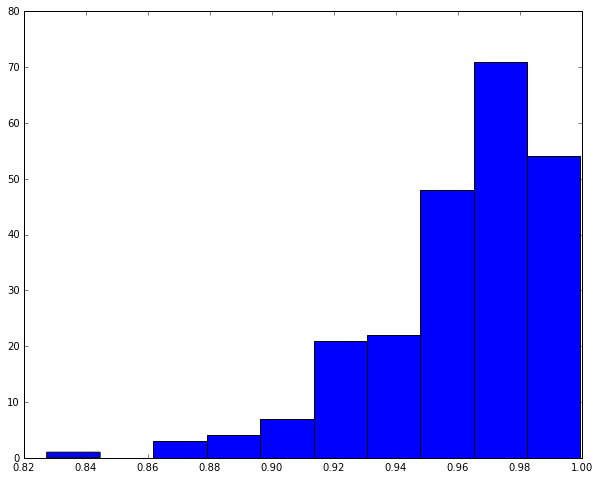

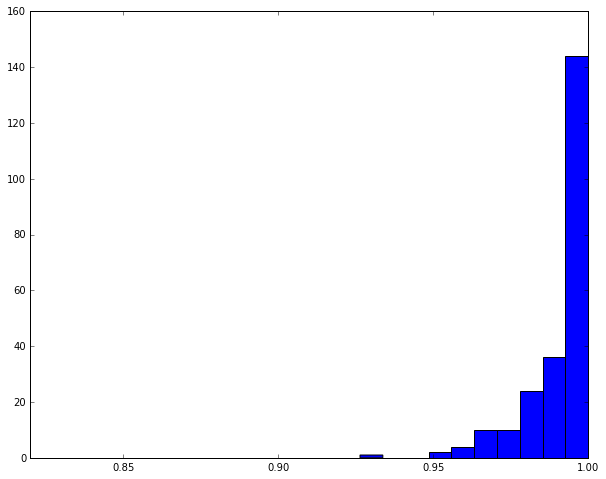

In [68]:
#check what happens between 0.8 and 0.9
a =temp11['is_iceberg_median'][np.all(temp11.iloc[:,0:num] > 0.9, axis=1).astype(np.int)+(np.all(temp11.iloc[:,0:num] > 0.8, axis=1)).astype(np.int)==1]
plt.hist(a)
plt.show()

a =temp11['is_iceberg_max'][np.all(temp11.iloc[:,0:num] > 0.9, axis=1).astype(np.int)+(np.all(temp11.iloc[:,0:num] > 0.8, axis=1)).astype(np.int)==1]
plt.axes(xlim=(0.82,1))
plt.hist(a)
plt.show()

#np.sum((np.all(temp11.iloc[:,0:num] > 0.9, axis=1) +np.all(temp11.iloc[:,0:num] > 0.8, axis=1) ==1))


In [71]:
print(np.sum(1- temp11['is_iceberg_max'][np.all(temp11.iloc[:,0:num] > 0.9, axis=1).astype(np.int)+(np.all(temp11.iloc[:,0:num] > 0.8, axis=1)).astype(np.int)==1]))

print(np.sum(temp11['is_iceberg_min'][np.all(temp11.iloc[:,0:num] < 0.2, axis=1).astype(np.int)+(np.all(temp11.iloc[:,0:num] < 0.1, axis=1)).astype(np.int)==1]))

1.97791260732
1.47904292347


In [13]:
sub=pd.DataFrame()
sub['id'] = test['id']
sub['is_iceberg'] = temp117['is_iceberg_other'] #temp11['is_iceberg']
# sub['is_iceberg'] =  temp11['leak_is_iceberg']
# sub['inc_angle'] = test['inc_angle']
#
sub.to_csv('submissions5.csv',index=False)


In [21]:
temp11.corr()

,fcn,cnn,inception,basic_vgg,vgg19,resnet50,200-dense,my_gbm,senet,vggbn,...,is_iceberg_min,is_iceberg_median,is_iceberg_mean,is_iceberg,if_allover_0.9,if_allover_0.8,if_allover_0.7,if_below_0.3,if_below_0.2,if_below_0.1
fcn,1.000000,0.832348,0.916128,0.861813,0.898752,0.933076,0.938665,0.433951,0.933137,0.855066,...,0.908219,0.955055,0.944523,0.952460,0.664879,0.748581,0.826698,-0.433007,-0.367364,-0.296551
cnn,0.832348,1.000000,0.798170,0.918358,0.897122,0.800631,0.811620,0.596972,0.895147,0.843168,...,0.781754,0.914373,0.923311,0.912665,0.567951,0.640293,0.705357,-0.574962,-0.483481,-0.388681
inception,0.916128,0.798170,1.000000,0.823361,0.865564,0.965714,0.941159,0.420814,0.921430,0.870805,...,0.941880,0.941403,0.935631,0.940197,0.698965,0.788763,0.869671,-0.408973,-0.342624,-0.275675
basic_vgg,0.861813,0.918358,0.823361,1.000000,0.957020,0.824464,0.822954,0.618320,0.903050,0.879678,...,0.791074,0.937516,0.946759,0.934865,0.569749,0.641752,0.705573,-0.586664,-0.508009,-0.416794
vgg19,0.898752,0.897122,0.865564,0.957020,1.000000,0.876878,0.866716,0.557442,0.917590,0.877734,...,0.841761,0.956852,0.957886,0.954103,0.606702,0.685188,0.757537,-0.530939,-0.456650,-0.373287
resnet50,0.933076,0.800631,0.965714,0.824464,0.876878,1.000000,0.944878,0.393136,0.923059,0.854346,...,0.945176,0.944428,0.934778,0.942952,0.698988,0.788768,0.869168,-0.387541,-0.323015,-0.259965
200-dense,0.938665,0.811620,0.941159,0.822954,0.866716,0.944878,1.000000,0.411951,0.951330,0.847724,...,0.944818,0.946410,0.936749,0.944166,0.707224,0.796092,0.874932,-0.400103,-0.337670,-0.271167
my_gbm,0.433951,0.596972,0.420814,0.618320,0.557442,0.393136,0.411951,1.000000,0.548838,0.555548,...,0.402440,0.540974,0.612818,0.547263,0.311225,0.341762,0.359686,-0.865625,-0.770609,-0.634656
senet,0.933137,0.895147,0.921430,0.903050,0.917590,0.923059,0.951330,0.548838,1.000000,0.884432,...,0.914325,0.974355,0.974965,0.971334,0.694187,0.774217,0.840167,-0.518647,-0.443578,-0.377963
vggbn,0.855066,0.843168,0.870805,0.879678,0.877734,0.854346,0.847724,0.555548,0.884432,1.000000,...,0.840407,0.923802,0.930769,0.922589,0.613482,0.692464,0.763103,-0.528916,-0.455748,-0.373670


In [5]:
#sub.corr()
np.sum(np.sum(temp11.iloc[:,:8]<=0.2,axis=1)==8)
#8 models below 0.1: 1232
#8 models above 0.9: 852

#8 models below 0.1: 1814
#8 models above 0.9: 1042
temp11.corr()

is_iceberg0  is_iceberg1  is_iceberg2  is_iceberg3  is_iceberg4  \
is_iceberg0      1.000000     0.923962     0.926000     0.909119     0.919314   
is_iceberg1      0.923962     1.000000     0.971590     0.958572     0.960090   
is_iceberg2      0.926000     0.971590     1.000000     0.968995     0.964438   
is_iceberg3      0.909119     0.958572     0.968995     1.000000     0.963246   
is_iceberg4      0.919314     0.960090     0.964438     0.963246     1.000000   
is_iceberg5      0.946048     0.953445     0.956981     0.942467     0.948499   
is_iceberg6      0.924365     0.968606     0.966492     0.947936     0.955165   
is_iceberg7      0.934897     0.975729     0.974273     0.968145     0.967751   
is_iceberg8      0.933930     0.964227     0.967972     0.969159     0.973333   
is_iceberg9      0.944266     0.959268     0.966393     0.954459     0.958580   
is_iceberg10     0.940302     0.961102     0.957023     0.947557     0.954432   
is_iceberg11     0.959982     0.960485     0.960991     0.949179     0.961952   
is_iceberg12     0.895422     0.971704     0.972207     0.966722     0.966029   
is_iceberg13     0.915018     0.959292     0.966119     0.969330     0.967009   
is_iceberg14     0.943404     0.969708     0.966126     0.957571     0.962830   
is_iceberg15     0.955850     0.964525     0.966464     0.959201     0.959199   
is_iceberg16     0.953379     0.964204     0.969678     0.965034     0.962296   
is_iceberg17     0.968419     0.942576     0.945651     0.929086     0.937403   
is_iceberg18     0.946542     0.959959     0.968601     0.964903     0.963785   
is_iceberg19     0.952630     0.963467     0.965411     0.949834     0.951300   
is_iceberg       0.953547     0.983551     0.984649     0.976840     0.978995   

              is_iceberg5  is_iceberg6  is_iceberg7  is_iceberg8  is_iceberg9  \
is_iceberg0      0.946048     0.924365     0.934897     0.933930     0.944266   
is_iceberg1      0.953445     0.968606     0.975729     0.964227     0.959268   
is_iceberg2      0.956981     0.966492     0.974273     0.967972     0.966393   
is_iceberg3      0.942467     0.947936     0.968145     0.969159     0.954459   
is_iceberg4      0.948499     0.955165     0.967751     0.973333     0.958580   
is_iceberg5      1.000000     0.953060     0.951765     0.950270     0.957765   
is_iceberg6      0.953060     1.000000     0.963791     0.951813     0.959498   
is_iceberg7      0.951765     0.963791     1.000000     0.971472     0.968455   
is_iceberg8      0.950270     0.951813     0.971472     1.000000     0.960976   
is_iceberg9      0.957765     0.959498     0.968455     0.960976     1.000000   
is_iceberg10     0.954576     0.963556     0.964883     0.952622     0.965455   
is_iceberg11     0.963430     0.957845     0.971644     0.965549     0.969091   
is_iceberg12     0.934449     0.966225     0.970846     0.964073     0.951126   
is_iceberg13     0.947118     0.944478     0.967383     0.970364     0.955498   
is_iceberg14     0.957534     0.960194     0.968154     0.967858     0.959165   
is_iceberg15     0.959983     0.960551     0.975303     0.964313     0.971673   
is_iceberg16     0.961437     0.949674     0.975862     0.970330     0.970501   
is_iceberg17     0.956564     0.938952     0.955174     0.949307     0.960100   
is_iceberg18     0.953767     0.951421     0.974860     0.970875     0.964053   
is_iceberg19     0.965055     0.955018     0.970129     0.956546     0.965306   
is_iceberg       0.973669     0.974033     0.988864     0.982544     0.979345   

                 ...      is_iceberg11  is_iceberg12  is_iceberg13  \
is_iceberg0      ...          0.959982      0.895422      0.915018   
is_iceberg1      ...          0.960485      0.971704      0.959292   
is_iceberg2      ...          0.960991      0.972207      0.966119   
is_iceberg3      ...          0.949179      0.966722      0.969330   
is_iceberg4      ...          0.961952      0.966029      0.967009   
is_iceberg5      ...        

In [12]:
num =4
temp11 = pd.read_csv('others/fcn_20_models.csv')
temp11['is_iceberg'] = 0
for i in range(num):
    temp11['is_iceberg'] += temp11.iloc[:,5*i:5*(i+1)].median(axis=1)
temp11['is_iceberg'] = temp11['is_iceberg']/num

In [23]:
temp13=pd.read_csv('others/resnet50_10fold_withaug_nodense.csv')
temp14=pd.read_csv('others/resnet50_10fold_withaug_nodense2.csv')

In [24]:
test = pd.DataFrame()
test['is_ice1'] = temp13.median(axis=1)
test['is_ice2'] = temp14.median(axis=1)
test.corr()

,is_ice1,is_ice2
is_ice1,1.000000,0.989324
is_ice2,0.989324,1.000000


# Below are all about training set!

In [44]:
# Check how wrongness distributed
tempp1= pd.read_csv('training_set_result/resnet50_10fold_withaug_nodense1.csv')

a = pd.concat((train,tempp1),axis=1)

In [8]:
temp161 = pd.read_csv('training_set_result/resnet50_10fold_withaug_nodense1.csv')
temp162 = pd.read_csv('training_set_result/resnet50_10fold_withaug_nodense2.csv')
temp163 = pd.read_csv('training_set_result/resnet50_10fold_withaug_nodense3.csv')
a = pd.concat((temp161,temp162,temp163), axis=1)
# temp16['is_iceberg_summary0']
a.shape
a.to_csv('training_set_result/resnet50_10fold_withaug_nodense_all50.csv',index=False)

(1604, 50)

In [10]:
#resnet50
temp16 = pd.read_csv('training_set_result/resnet50_10fold_withaug_nodense_all50.csv')

for i in range(5):
    temp16['is_iceberg_max'] = temp16.iloc[:, 10*i:10*(i+1)].max(axis=1)
    temp16['is_iceberg_min'] = temp16.iloc[:, 10*i:10*(i+1)].min(axis=1)
    temp16['is_iceberg_median'] = temp16.iloc[:, 10*i:10*(i+1)].median(axis=1)
    temp16['is_iceberg_mean'] = temp16.iloc[:, 10*i:10*(i+1)].mean(axis=1)
    
    msg = 'is_iceberg_summary%d'%i
    cutoff_lo = 0.8
    cutoff_hi = 0.2

    # temp11['is_iceberg_base'] = temp11['senet']
    temp16[msg] = np.where(np.all(temp16.iloc[:,10*i:10*(i+1)] > cutoff_lo, axis=1), 
                                    temp16['is_iceberg_max'], 
                                    np.where(np.all(temp16.iloc[:,10*i:10*(i+1)] < cutoff_hi, axis=1),
                                             temp16['is_iceberg_min'], 
                                             temp16['is_iceberg_median']))
temp16['is_iceberg']=temp16.iloc[:,54:58].median(axis=1)


In [14]:
np.mean(-np.log(temp16['is_iceberg']) * train['is_iceberg']-np.log(1-temp16['is_iceberg']) * (1-train['is_iceberg']))

0.075401403267299411

In [45]:
a['median'] = tempp1.median(axis=1)

In [47]:
a['pred'] = a['median']>0.5
a['correct'] = (a['pred']==a['is_iceberg'])
a.head()
a.drop(['band_1','band_2'],axis=1,inplace=True)
# with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
# print(a.sort_values(by=['correct','median']))
pd.set_option('display.max_rows', 1500)
pd.set_option('display.width', 1000)
a.round(3).sort_values(by=['correct','median'])
#wrongness_2 = a.iloc[a.correct=='False',:]

ValueError: labels ['band_1' 'band_2'] not contained in axis

In [43]:
a.loc[a.correct==False,:]

,id,inc_angle,is_iceberg,is_iceberg0,is_iceberg1,is_iceberg2,is_iceberg3,is_iceberg4,is_iceberg5,is_iceberg6,is_iceberg7,is_iceberg8,is_iceberg9,median,pred,correct
19,6d81d201,37.2802,1,0.218657,0.704034,0.708268,0.017979,0.286468,0.150962,0.953353,0.153365,0.848980,0.368333,0.327401,False,False
21,112a6cfa,38.0669,1,0.883262,0.692344,0.202991,0.053850,0.071264,0.388982,0.227395,0.108608,0.156983,0.201265,0.202128,False,False
33,f193e8b0,44.6239,1,0.913831,0.107911,0.718351,0.661972,0.410473,0.443076,0.791026,0.472498,0.135808,0.111064,0.457787,False,False
92,c6ffd9f1,37.9756,0,0.910330,0.396520,0.948760,0.508886,0.785073,0.854134,0.740655,0.755642,0.294355,0.660624,0.748149,True,False
161,2f881d78,45.927,0,0.021183,0.693612,0.996889,0.733994,0.813239,0.989236,0.899553,0.988709,0.739390,0.519553,0.776315,True,False
178,a9ab128c,38.1164,1,0.717542,0.728237,0.223407,0.295403,0.106896,0.098800,0.870237,0.387833,0.734104,0.534447,0.461140,False,False
292,a996191d,37.2175,1,0.215260,0.369562,0.124004,0.219604,0.539921,0.038957,0.023456,0.034463,0.326683,0.229805,0.217432,False,False
308,87319e1c,43.2353,1,0.235214,0.628867,0.912983,0.982623,0.014179,0.043364,0.006657,0.084766,0.262475,0.028313,0.159990,False,False
333,74c92938,38.2635,0,0.275215,0.771843,0.760990,0.838667,0.927888,0.938632,0.954233,0.428436,0.827833,0.583722,0.799838,True,False
350,1303a495,44.0157,0,0.489431,0.796927,0.977969,0.976103,0.786788,0.935533,0.975067,0.658529,0.988640,0.961612,0.948572,True,False


In [48]:
a.loc[a.correct==False,:]

,id,inc_angle,is_iceberg,is_iceberg0,is_iceberg1,is_iceberg2,is_iceberg3,is_iceberg4,is_iceberg5,is_iceberg6,is_iceberg7,is_iceberg8,is_iceberg9,median,pred,correct
19,6d81d201,37.2802,1,0.344484,0.461320,0.492327,0.186213,0.613589,0.706688,0.499429,0.808051,0.374873,0.713955,0.495878,False,False
21,112a6cfa,38.0669,1,0.513988,0.257921,0.965209,0.825150,0.283423,0.520630,0.248155,0.485388,0.380251,0.272554,0.432820,False,False
72,d8b894c2,45.3718,0,0.641839,0.687207,0.437292,0.832401,0.740546,0.402174,0.825978,0.531645,0.450517,0.351333,0.586742,True,False
76,ebff4efc,42.5381,0,0.612915,0.687854,0.007365,0.793295,0.695601,0.751668,0.529469,0.809672,0.409945,0.203710,0.650385,True,False
129,97e2d963,41.1415,0,0.169953,0.110777,0.501668,0.701063,0.751869,0.551845,0.626769,0.208492,0.468181,0.683575,0.526756,True,False
161,2f881d78,45.927,0,0.994245,0.942021,0.913781,0.988422,0.338664,0.993459,0.988852,0.995995,0.953821,0.935115,0.971122,True,False
178,a9ab128c,38.1164,1,0.493825,0.126806,0.309721,0.646223,0.080566,0.557745,0.076069,0.547313,0.128283,0.228654,0.269188,False,False
240,c88fb497,40.9835,0,0.903064,0.648103,0.159631,0.648177,0.338307,0.445059,0.898214,0.963070,0.815004,0.035333,0.648140,True,False
292,a996191d,37.2175,1,0.204937,0.304802,0.281915,0.787611,0.003415,0.179759,0.270406,0.339136,0.193605,0.373986,0.276161,False,False
308,87319e1c,43.2353,1,0.961547,0.497176,0.121291,0.226875,0.010685,0.077583,0.466094,0.506500,0.703055,0.582132,0.481635,False,False
